# Lab 01: Algorithm Design and Analysis
ISC 4221<br>
Due September 11th, 2019<br>
Connor Poetzinger<br> 

## 1. Selection Sort

Implementation of Selection Sort algorithm. This algorithm takes in an array of *n* real numbers to be sorted and outputs the the sorted array in ascending order as well as an index vector.

In [41]:
#Import modules 
import numpy as np
import matplotlib.pyplot as plt
import time 

"""
Input: Numpy array of random real numbers from 0 to 100
Output: Sorted array and index vector

Goal: Take current element and swap it with the smallest element on its right 
"""

def selectionSort(A):
    #Start clock 
    time_start = time.perf_counter()
    #use numpy argsort to return indicies that would sort the array 
    indx = np.argsort(A)
    #Traverse through numpy array 
    for i in range(len(A)):
        #initial minimum location 
        min_loc = i
        #find location of smallest element on right 
        for j in range(i + 1, len(A)):
            #Check if number to the right is smaller then minimum location
            if A[j] < A[min_loc]:
                min_loc = j
        #Within the first for loop swap the minimum location with first element 
        A[min_loc], A[i] = A[i], A[min_loc]
#     #End clock and output elapsed time 
#     time_elapsed = (time.perf_counter() - time_start)
#     print("Time elapsed: {}".format(time_elapsed))
    
    plt.bar(range(len(A)), A, align="edge")
    
    return A, indx

In [42]:
A = np.random.rand(25) * 100

(array([ 1.3078088 ,  1.54756278,  8.77857756, 12.20203512, 20.14577019,
        39.39584546, 40.73911394, 43.68758335, 49.74982297, 49.91006553,
        54.94927008, 60.39091555, 67.06969594, 71.0103074 , 72.76420415,
        75.09980616, 75.9021707 , 77.85983997, 80.13176338, 88.79754655,
        89.71386387, 93.19140944, 97.21829586, 97.38969981, 98.47098424]),
 array([ 4, 10, 11, 23, 19, 20, 12,  3,  0, 18,  5, 15, 17, 14, 24,  8,  1,
         2, 16, 21,  9, 13,  7,  6, 22], dtype=int64))

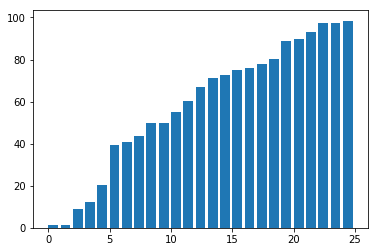

In [43]:
selectionSort(A)

## 2. Bubble Sort

Implementation of Bubble Sort algorithm. This algorithm takes in an array of *n* real numbers to be sorted and outputs the the sorted array in ascending order as well as an index vector.

In [44]:
#Import modules 
import numpy as np
import matplotlib.pyplot as plt
import time 

"""
Input: Numpy array of random real numbers from 0 to 100
Output: Sorted array and index vector

Goal: Move left to right, compare consedcutive elements and switch them if 
they are out of order. Continue until no swaps are made through an entire
sweep.
"""

def bubbleSort(A):
    #Start clock 
    time_start = time.perf_counter()
    #use numpy argsort to return indicies that would sort the array 
    indx = np.argsort(A)
    #Traverse the numpy array
    for i in range(len(A)):
        #At each sweep compare the current j with the next value 
        #Use length minus 1 since we are comparing the current value 
        #with the next 
        for j in range((len(A) - 1) - i):
            #Swap positions if element found is greater than the next 
            #element. Largest nums bubble to the back 
            if A[j] > A[j + 1]:
                #Current element moves to the back 
                A[j], A[j + 1] = A[j + 1], A[j]
    
#     #End clock and output elapsed time 
#     time_elapsed = (time.perf_counter() - time_start)
#     print("Time elapsed: {}".format(time_elapsed))
    
    plt.bar(range(len(A)), A, align="edge")
    
    return A, indx

In [45]:
A = np.random.rand(25) * 100

(array([ 3.48860445,  4.75413762, 16.82970925, 17.05362548, 19.77025794,
        21.40272725, 30.82780206, 34.20474845, 37.33888822, 38.64588238,
        39.94369781, 41.81507109, 46.40383458, 51.31689591, 55.5740336 ,
        58.62667737, 61.20537712, 61.38452037, 65.18085566, 68.58791352,
        70.97866369, 73.51299207, 86.13095215, 91.90141282, 94.19343044]),
 array([ 4, 18,  1, 22, 24, 19, 15, 17, 21, 13, 14,  7,  3,  0,  5,  8,  9,
        16,  2,  6, 10, 12, 11, 20, 23], dtype=int64))

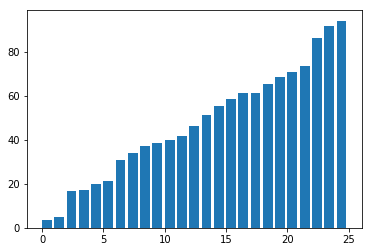

In [46]:
bubbleSort(A)

## 3. A Basic Application of Sorting

Using the haversine algorithm, find the distance between the store distance and the user inputed longitude and latitude. 

In [76]:
import numpy as np 
import pandas as pd 

def haversin():
    
    """
    This function reads in user latitude and logitude to simulate logging customer
    call locations. The user's long and lat are then converted to radians along 
    with other pre-defined longs and lats imported from a text file and save to a 
    pandas dataframe. The function then computes the distance from the caller to 
    the the stores in the dataframe using the haversine formula. The distances are
    then sorted in ascending order and printed out to provide the customer with 
    a list of closest stores, and how many miles to the store. 
    """
    
    #Read in user long and lat 
    #must transform string values to float 
    lon1 = float(input("Enter longitude: "))
    lat1 = float(input("Enter latitude: "))
    
    #import data table 
    #use pandas to assign columns using strings 
    data = pd.read_table('stores_location.dat', delim_whitespace=True, names = ('store', 'city', 'longitude', 'N', 'latitude','W'))
    
    #Radius of earth from the equator in miles (found on google)
    R = 3963.0
    
    #assign user lat and lon and datatable lat and long to variables
    #I use the in-built function map to assign the numpy function np.radians to the degree
    #lats and long to transform degree into radians 
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, data.latitude, data.longitude])
    
    #calculate the distance between the lats and longs
    lon_dist = lon2 - lon1
    lat_dist = lat2 - lat1
    
    #apply haversine formula 
    #np cos and sin provide for faster calculations 
    c = 2 * R * np.arcsin(np.sqrt((np.sin(lat_dist)/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon_dist)/2)**2 ))
    
    #prompt user for the info provided 
    print("\nBelow are the closest stores from your location in ascending order")
    #apply selection sort 
    #selectionSort(c)
    data['distance'] = c
    
    sorted_result = selectionSort(c)
    return

data['distance'] = haversin()
data

Enter longitude: 29.1872
Enter latitude: 82.1401

Below are the closest stores from your location in ascending order


,store,city,longitude,N,latitude,W,distance
0,store#1,Tallahassee,30.4550,N,84.2533,W,146.499565
1,store#2,Gainesville,29.6520,N,82.3250,W,13.506884
2,store#3,Miami,25.7753,N,80.2089,W,138.320361
3,store#4,Jacksonville,30.3369,N,81.6614,W,34.952699
4,store#5,Tampa,27.9681,N,82.4764,W,25.852982
5,store#6,Orlando,28.4158,N,81.2989,W,58.685998
6,store#7,Hialeah,25.8606,N,80.2939,W,132.373499
